## Objectives:

 * Learn fundamental programming concepts and how to apply them with Python
    * How Python interprets code
    * Logic: if, and, or, etc.
    * Flow control: for loops
    * Objects: arrays, lists, dicts, etc.
 * Learn how to apply the scientific method for debugging code
 * Learn how to write a function
 * Learn to use spyder
 

## Overview

The week 1 lesson revolves around writing code to find and count precipitation events in a given precipitation dataset; the students will also determine event lengths.  This will require use of `for` statements to run through an array, `if`-statements to determine precipitation presence, `and` conditions to properly determine precipitation event existence, and `array` and `list` structures for tracking precipitation.  It will also provide an introduction into how Python generally works, and presumably it will also provide an introduction to debugging.  All of this will be done in iPython notebooks.


### Dataset details
I ordered the following dataset from NCDC:

```
	Order Summary
Order Number:	711323
Order Status:	Submitted
Order Format:	
Email Address:	taobrien@lbl.gov
Date Submitted:	2016-3-28 22:28 EST
 	Period of Request
Start Date:	1/1/2000
End Date:	1/1/2014
 	Requested Data
Custom Options:	Station name, Geographic location, Include data flags	
Stations:	COOP:042294 - DAVIS 2 WSW EXPERIMENTAL FARM, CA US
Data Types:	QGAG - Precipitation (10th or 100th of an inch)
QPCP - Precipitation (10th or 100th of an inch)
```

The downloaded file is contained in the class repository; it can be downloaded from the URL in the `get_and_read_data()` function below.

The dataset documentation is at [http://www1.ncdc.noaa.gov/pub/data/cdo/documentation/PRECIP_15_documentation.pdf](http://www1.ncdc.noaa.gov/pub/data/cdo/documentation/PRECIP_15_documentation.pdf)

## Getting started

In class, we discussed developing an algorithm for making a histogram of event lengths into three main steps:

1. Read in data
2. Generate a list of precip event lengths
3. Generate a histogram

For today's assignment, groups will be focusing on step 2: generating a list of precip event lengths.

Below, I have provided code that you should copy and paste into a script in Spyder.  The first function, `get_and_read_data()` deals with step #1.  The second function, `plot_histogram()` generates a histogram from a list of event lengths; this deals with step #3.  Your job is to write a function that deals with step #2.

In code, the algorithm above can be written as:

```python

# 1. Read in data
precip_values = get_and_read_data()

#2. Generate a list of precip event lengths
event_lengths = get_event_lengths(precip_values)

#3. Generate a histogram
plot_histogram(event_lengths)

```

So in other words, you need to write the `get_event_lengths()` function in the above code.  Let me know once your group has done this.

*Note that there are missing values, which somehow must be dealt with.*


# Code to paste into Spyder:

In [1]:
# load plotting tools (commands prefixed with PP)
import pylab as PP

# load numpy tools (prefixed with np)
import numpy as np

# load a library for downloading files
import urllib

# define a function to download and read in data
def get_and_read_data():
    """
    Downloads a precip data file and loads it.  
    
    Returns a vector of precip values, which corresponds to a timeseries of 
    precip from a specific station.
    
    """

    data_url = 'https://bitbucket.org/taobrienucd/taobrienucd.bitbucket.org/raw/master/data/711323.csv'
    try:
        # attempt to get the data file using the following syntax
        urllib.urlretrieve(data_url,'711323.csv')
    except:
        try:
            # if that failed, then try to get the data file python3 style
            urllib.request.urlretrieve(data_url,'711323.csv')
        except:
            # if that didn't work, something else is wrong (network connection?).  Travis or Héctor will help.
            raise RuntimeError("Could not download CSV file; let Travis or Hector know")
    
        
    try:
        # set the data file
        data_file = '711323.csv'
    
        # load the data using numpy's `loadtxt()` function
        # determined skiprows, usecols, and delimeter from opening
        # and visually examining the data
        qpcp = np.loadtxt(data_file,skiprows=1,usecols=[10],delimiter=',')
    except:
        raise RuntimeError("Could not open downloaded CSV file; let Travis or Hector know")
    
    
    # determine where data are bad
    bad_data_mask = np.logical_or(abs(qpcp) == 9999, abs(qpcp) == 99999)
    
    # use nonzero() to get indices of bad data
    bad_indices = np.nonzero(bad_data_mask)[0]
    
    # create a copy of qpcp with bad values replaces with 0
    qpcp_inches = np.array(qpcp)
    qpcp_inches[bad_indices] = 0.0
    
    # convert units to inches (note the file has units flagged as 'HT' throughout)
    # which the documentation says means tenth-inch
    qpcp_inches /= 10
    
    # return the precip dataset
    return qpcp_inches

# define a function for evaluating output
def plot_histogram(event_lengths, filename='precip_histogram.png'):
    """ Given a list of event lengths, generate a plot.
    
        input:
        -----
            event_lengths : an array-like object (1D) of event lengths
            
            filename      : the path to which to write the histogram figure
            
        output:
        ------
        
            Generates a histogram of event lengths.
    """
    # count the total number of precip events
    num_events = len(event_lengths)
    
    # plot a histogram of event lengths
    PP.hist(event_lengths)
    
    # set axis labels
    PP.xlabel('Number of events')
    PP.ylabel('Count')
    
    # set the title
    PP.title('Total #: {}'.format(num_events))
    
    # save the figure at 300 dots per inch
    PP.savefig(filename,dpi=300)
    
    # show the figure
    PP.show()

## Instructor key

The following code shows how Travis went about writing code to accomplish the lesson's task.

### counting precipitation events (the loop-based way)

In [2]:
def get_event_lengths(qpcp_inches):
    """ Counts the durations (in indices) of contiguous precipitation events in a precipitation vector.
    
        input:
        ------
            qpcp_inches : a quality-controlled precipitation where missing values are represented as 0's
                          (making the assumption of no precipitation on missing days)
                          
        output:
        -------
        
            returns a list of event durations
    
    """
    # loop over the precipitation variable
    number_of_events = 0

    # initialize the event counter to 0
    num_events = 0

    # inialize the 'in_precip' flag
    in_precip = False

    # initialize the event lengths list
    event_lengths = []

    # initialize the current event length
    current_length = 0

    # loop over indices of the qpcp_inches variable
    for i in range(len(qpcp_inches)):

        # determine if this is a precipitation event
        if qpcp_inches[i] > 0:
            is_precip = True
        else:
            # flag that this isn't a precip event
            is_precip = False

        # determine if we are already in a precipitation event
        if is_precip:
            # check if we are in a precip event
            if in_precip:
                # increment the current event length counter
                current_length = current_length + 1

            else:
                # flag that we are now in a precipitation event
                in_precip = True

                # increment the event counter
                num_events = num_events + 1

                # set the current event length counter to 1
                current_length = 1
        else:
            # check if we were in a precip event
            if in_precip:
                # if so, the current event has ended; add it to the list
                event_lengths.append(current_length)

            # if this isn't a precip event, flag that we aren't in a precip
            # event
            in_precip = False
            
    return event_lengths

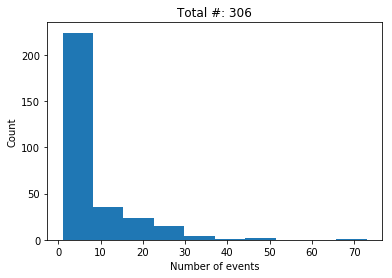

In [3]:
""" Demonstrate that the above function works. """
# 1. Read in data
precip_values = get_and_read_data()

#2. Generate a list of precip event lengths
event_lengths = get_event_lengths(precip_values)

#3. Generate a histogram
plot_histogram(event_lengths)

### counting precipitation events (the vector-based way)

In [4]:
from numpy import * # import everything from the numpy library for easy array math

def get_event_lengths_vectorized(qpcp_inches):
    """ Counts the durations (in indices) of contiguous precipitation events in a precipitation vector.
    
        input:
        ------
            qpcp_inches : a quality-controlled precipitation where missing values are represented as 0's
                          (making the assumption of no precipitation on missing days)
                          
        output:
        -------
        
            returns a list of event durations
    
    """
    # generate a mask of precipitation events
    # (1 where there is precipitation, 0 otherwise)
    is_precip_event = array(qpcp_inches > 0,dtype=int)

    # use diff() to determine when precipitation events end and begin
    # will be 1 for the start of an event and -1 for the end of one
    precip_bounds = diff(is_precip_event)

    # count the number of beginnings and ends
    num_beginning = sum(precip_bounds == 1)
    num_end = sum(precip_bounds == -1)

    # check whether the first event is a beginning
    # get the index of the first event boundary
    i_first_bound = nonzero(precip_bounds != 0)[0][0]

    # assuming this all checked out, the number of events is the number
    # of beginnings
    num_events = num_beginning

    # get the event lengths: use the difference between the event start
    # and end indices
    i_beginning = nonzero(precip_bounds == 1)[0]
    i_end = nonzero(precip_bounds == -1)[0]
    
    # drop the last beginning index if there are more beginnings than ends
    if num_beginning > num_end:
        i_beginning = i_beginning[:-1]
        
    # likewise, drop the first end if there are more ends than beginnings
    if num_end > num_beginning:
        i_end = i_end[1:]
        
    event_lengths = i_end - i_beginning
    
    return event_lengths

Number of beginnings : 306, Number of ends 306
First event boudnary: 1


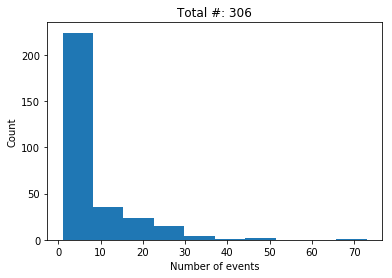

In [5]:
""" Demonstrate that the vector-based algorithm produces the same result. """
# 1. Read in data
precip_values = get_and_read_data()

#2. Generate a list of precip event lengths
event_lengths = get_event_lengths_vectorized(precip_values)

#3. Generate a histogram
plot_histogram(event_lengths)